In [41]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [42]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [43]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 17572 files belonging to 38 classes.


In [44]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [45]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[196.75 185.75 165.75]
   [182.75 171.75 151.75]
   [175.75 164.75 144.75]
   ...
   [144.25 117.25  98.25]
   [147.5  120.5  101.5 ]
   [151.25 124.25 105.25]]

  [[187.5  176.5  156.5 ]
   [188.   177.   157.  ]
   [179.5  168.5  148.5 ]
   ...
   [144.25 117.25  98.25]
   [147.75 120.75 101.75]
   [145.5  118.5   99.5 ]]

  [[187.   176.   156.  ]
   [179.   168.   148.  ]
   [189.25 178.25 158.25]
   ...
   [142.25 115.25  96.25]
   [149.   122.   103.  ]
   [144.75 117.75  98.75]]

  ...

  [[219.75 211.75 198.75]
   [214.25 206.25 193.25]
   [214.5  206.5  193.5 ]
   ...
   [170.5  151.5  134.5 ]
   [165.25 146.25 129.25]
   [175.5  156.5  139.5 ]]

  [[218.75 210.75 197.75]
   [206.75 198.75 185.75]
   [206.25 198.25 185.25]
   ...
   [179.75 160.75 143.75]
   [174.   155.   138.  ]
   [166.75 147.75 130.75]]

  [[207.75 199.75 186.75]
   [211.75 203.75 190.75]
   [212.   204.   191.  ]
   ...
   [174.25 155.25 138.25]
   [170.   151.   134.  ]
   [178.75 159.75 14

In [46]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [47]:
model = Sequential()

In [48]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [49]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [50]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [51]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [52]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [53]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [54]:
model.add(Flatten())

In [55]:
model.add(Dense(units=1500,activation='relu'))

In [56]:
model.add(Dropout(0.4))

In [57]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

In [59]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [60]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2809s 1s/step - accuracy: 0.5750 - loss: 1.4499 - val_accuracy: 0.8292 - val_loss: 0.5398
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2345s 1s/step - accuracy: 0.8477 - loss: 0.4771 - val_accuracy: 0.9072 - val_loss: 0.2952
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1969s 896ms/step - accuracy: 0.9083 - loss: 0.2857 - val_accuracy: 0.9176 - val_loss: 0.2490
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2053s 934ms/step - accuracy: 0.9373 - loss: 0.1929 - val_accuracy: 0.9393 - val_loss: 0.1898
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2564s 1s/step - accuracy: 0.9524 - loss: 0.1423 - val_accuracy: 0.9313 - val_loss: 0.2128
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2513s 1s/step - accuracy: 0.9625 - loss: 0.1112 - val_accuracy: 0.9502 - val_loss: 0.1596
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1976s 900ms/step - accuracy: 0.9695 - loss: 0.0901 - val_accuracy: 0.9635 - val_loss: 0.1210
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1802s 820ms/step - accura

In [90]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 827s 376ms/step - accuracy: 0.9916 - loss: 0.0269


In [91]:
print(train_loss,train_acc)

0.02688378095626831 0.9916494488716125


In [92]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 209s 379ms/step - accuracy: 0.9656 - loss: 0.1232


In [94]:
print(val_loss,val_acc)

0.12323080003261566 0.965627133846283


In [97]:
import tensorflow as tf

# Use the correct file name that you have in your folder
model_path = 'trained_model.keras'

# This line will now work
loaded_model = tf.keras.models.load_model(model_path)

print("✅ Model loaded successfully!")

✅ Model loaded successfully!


In [98]:
model.save("trained_model.keras")

In [99]:
model.save("trained_model.h5")

In [102]:
model.save('my_model.keras')

In [69]:
training_history.history

{'accuracy': [0.57504802942276,
  0.8476563096046448,
  0.9082865118980408,
  0.9372501373291016,
  0.9524290561676025,
  0.9624581933021545,
  0.969499945640564,
  0.9732840061187744,
  0.9791308045387268,
  0.9811792969703674],
 'loss': [1.4498997926712036,
  0.47707873582839966,
  0.2857075035572052,
  0.19287334382534027,
  0.14231638610363007,
  0.11124368011951447,
  0.09008046239614487,
  0.0803903192281723,
  0.06314850598573685,
  0.05808502435684204],
 'val_accuracy': [0.8292169570922852,
  0.907238781452179,
  0.917596161365509,
  0.939335286617279,
  0.9312542676925659,
  0.9502048492431641,
  0.9635215401649475,
  0.9678465723991394,
  0.9679034948348999,
  0.965627133846283],
 'val_loss': [0.5398094654083252,
  0.29520878195762634,
  0.249017134308815,
  0.18977390229701996,
  0.21279960870742798,
  0.15964189171791077,
  0.12101361155509949,
  0.10623619705438614,
  0.11103860288858414,
  0.12323077023029327]}

In [70]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [71]:
training_history.history['val_accuracy']

[0.8292169570922852,
 0.907238781452179,
 0.917596161365509,
 0.939335286617279,
 0.9312542676925659,
 0.9502048492431641,
 0.9635215401649475,
 0.9678465723991394,
 0.9679034948348999,
 0.965627133846283]

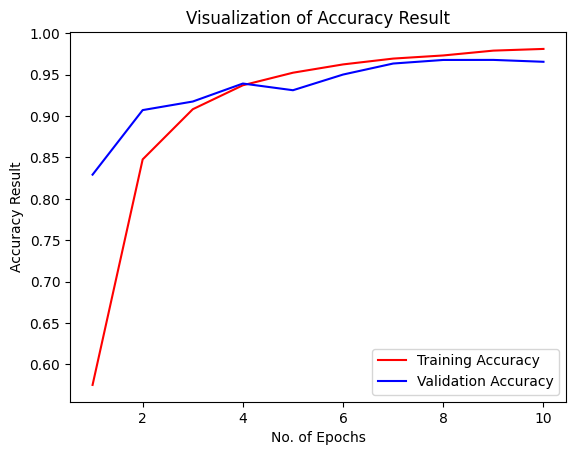

In [72]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [73]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [74]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [75]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 193s 349ms/step


(array([[9.9998701e-01, 9.8107812e-06, 2.5782842e-07, ..., 9.9670576e-13,
         2.4810275e-11, 1.9501494e-08],
        [9.9999988e-01, 5.8659740e-08, 6.8597412e-09, ..., 1.3564953e-16,
         1.6106491e-14, 4.2053218e-13],
        [9.9999905e-01, 5.5208801e-07, 1.2563645e-07, ..., 5.1074758e-16,
         2.2899675e-12, 4.4084539e-10],
        ...,
        [1.5178104e-11, 4.6438144e-14, 5.2380089e-10, ..., 2.4491149e-12,
         1.5137965e-12, 9.9999976e-01],
        [4.6075327e-12, 2.3567355e-14, 1.6913162e-11, ..., 5.7631000e-13,
         4.7045571e-13, 1.0000000e+00],
        [4.9104861e-16, 2.1746628e-17, 3.4162710e-16, ..., 7.5321371e-18,
         2.7070105e-13, 1.0000000e+00]], shape=(17572, 38), dtype=float32),
 (17572, 38))

In [76]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [77]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], shape=(17572,))>

In [78]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], shape=(17572, 38), dtype=float32)>

In [79]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], shape=(17572,))>

In [80]:
from sklearn.metrics import classification_report,confusion_matrix

In [81]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.94      0.95       504
                                 Apple___Black_rot       0.96      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.96      0.99      0.98       440
                                   Apple___healthy       0.96      0.96      0.96       502
                               Blueberry___healthy       0.99      0.96      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.97      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.91      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.96      0.

In [82]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[474,   8,   0, ...,   0,   0,   0],
       [  0, 492,   0, ...,   0,   0,   0],
       [  0,   0, 436, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 484,   0,   0],
       [  0,   0,   0, ...,   0, 448,   0],
       [  2,   0,   1, ...,   0,   0, 469]], shape=(38, 38))

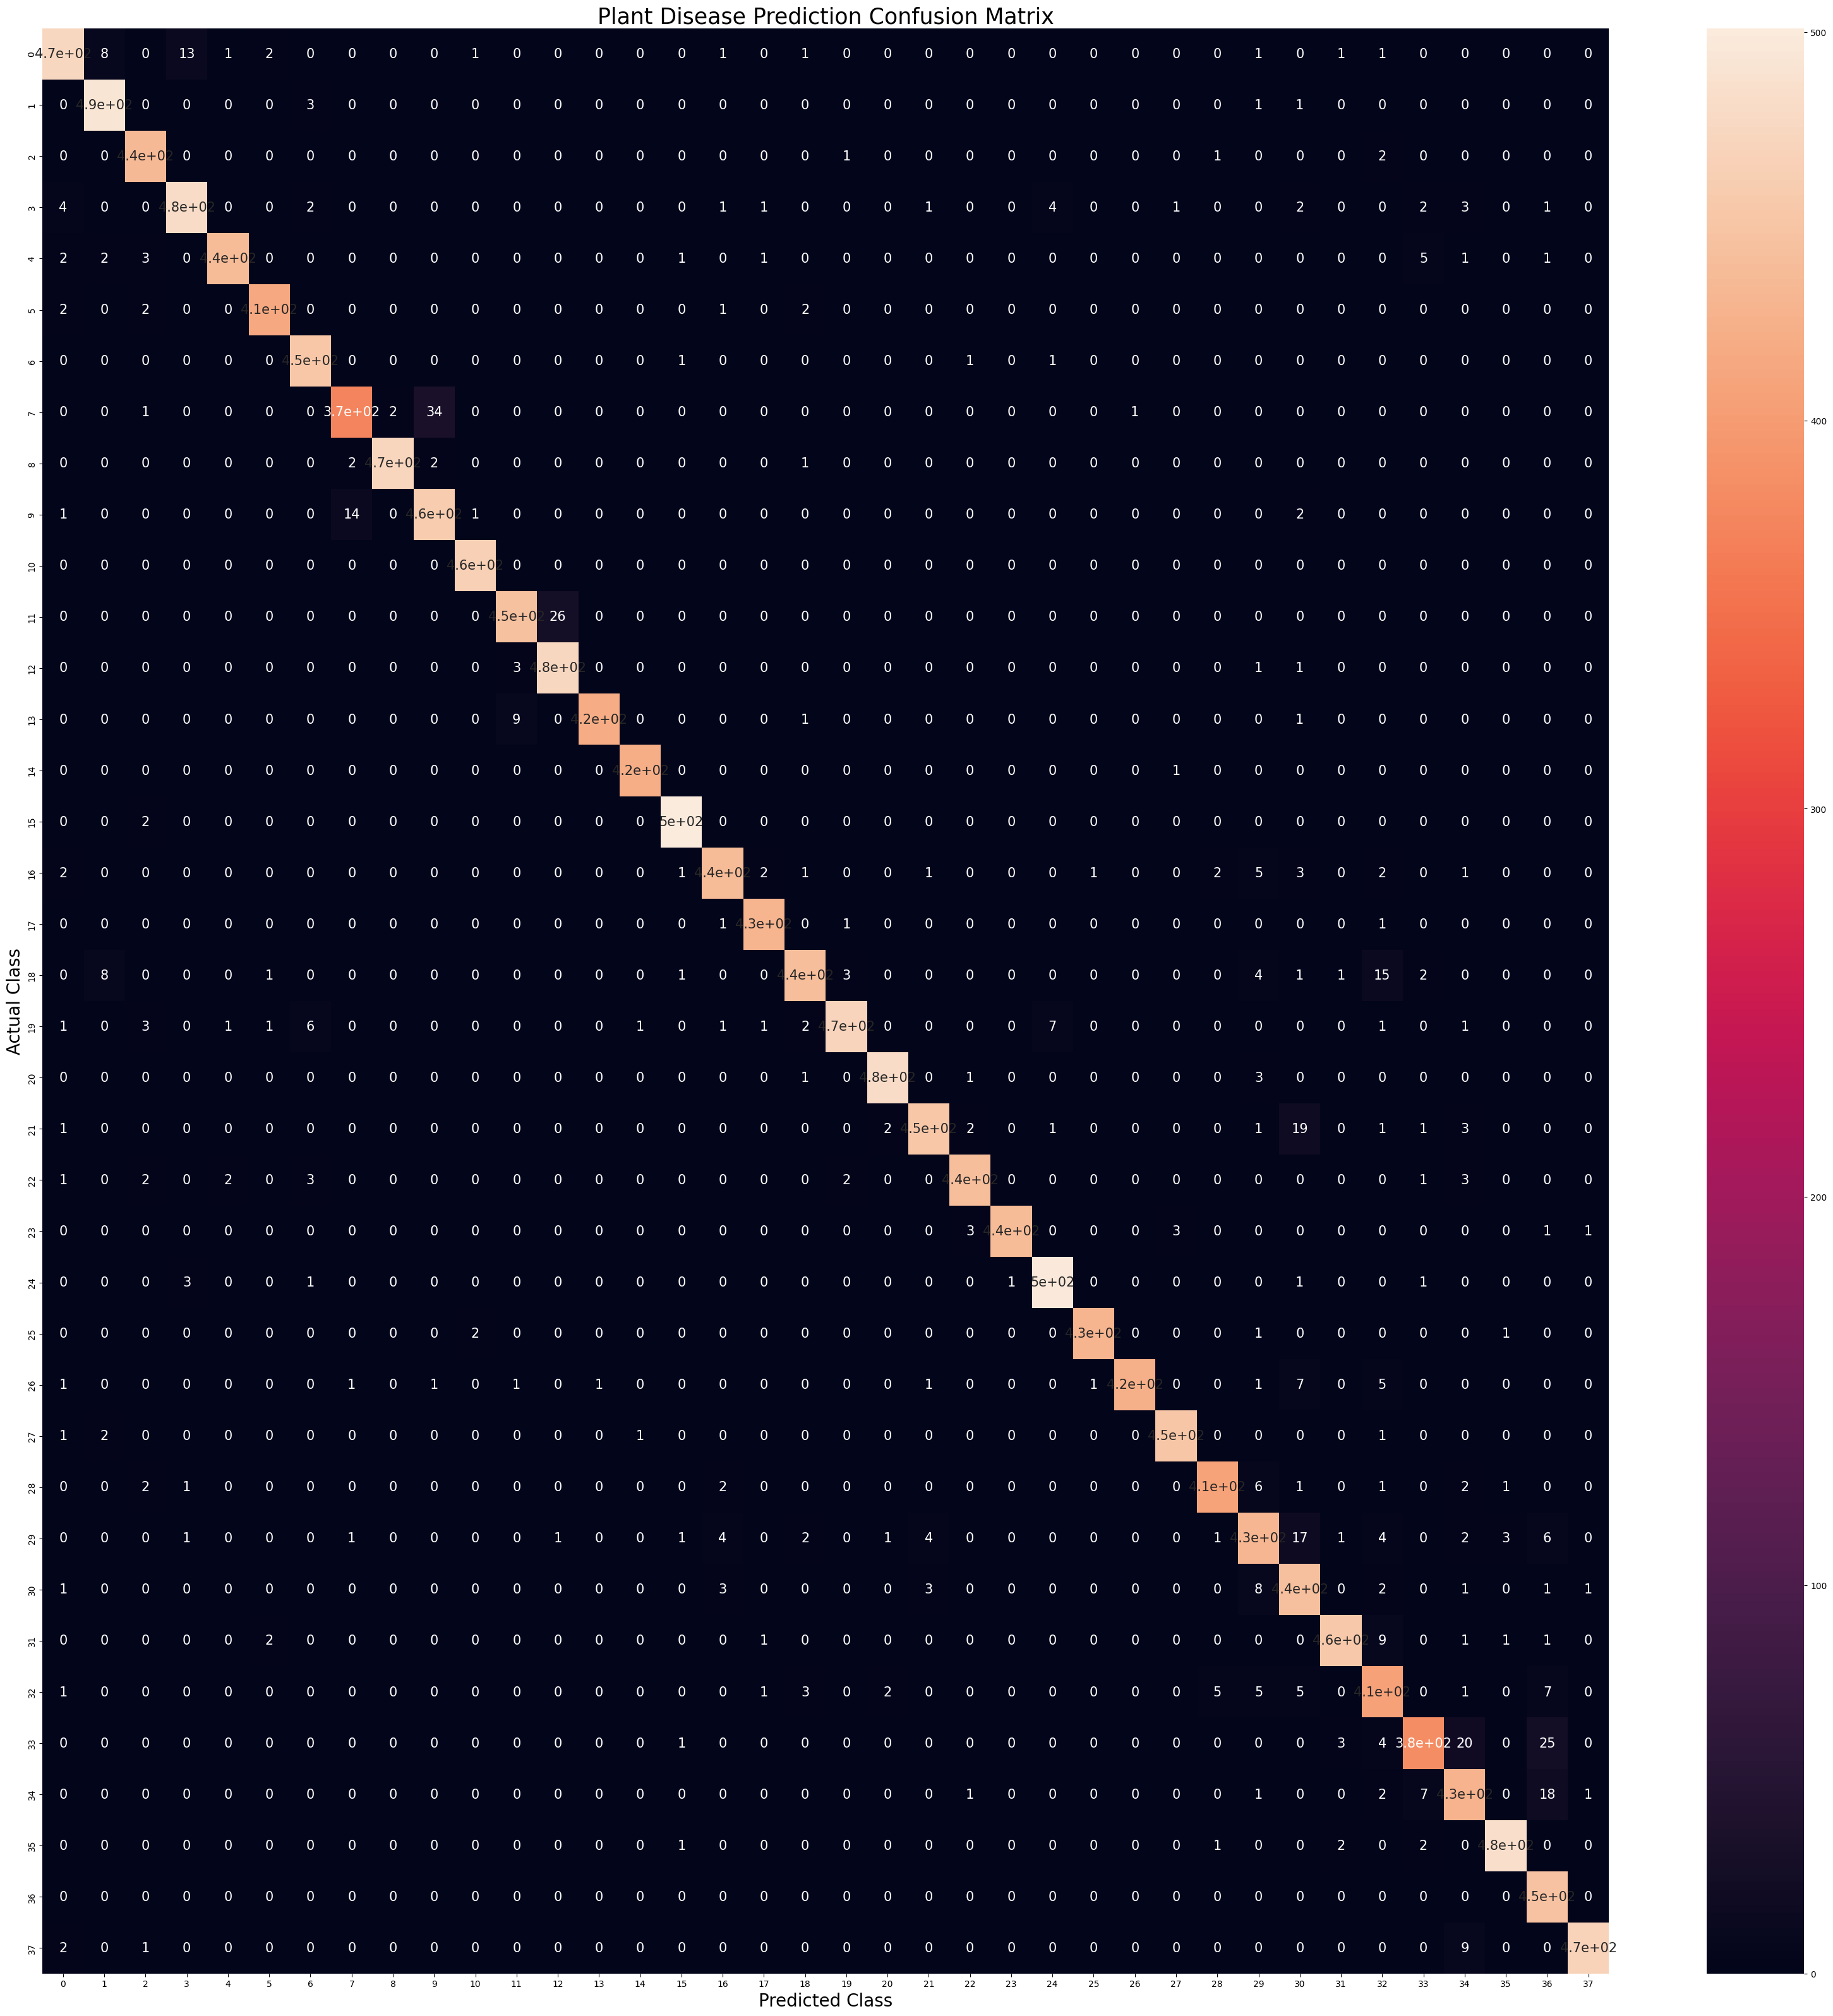

In [84]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':15})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()